# Participez à la conception d'une voiture autonome - Data_Generator 

**Future vision transport** est une entreprise qui conçoit des systèmes embarqués de vision par ordinateur pour les véhicules autonomes.

Je suis l’un des ingénieurs IA au sein de l’équipe R&D de cette entreprise, membre de l equipe **Segmentation des images**:

    - acquisition des images en temps réel
    - traitement des images
    - segmentation des images (c’est vous !)
    - système de décision


Le but de ce projet est de concevoir un premier modèle de segmentation d’images qui devra s’intégrer facilement dans la chaîne complète du système embarqué.

Mon rôle ici est de fournir à l équipe en charge du système de décision (4), une API simple à utiliser qui prend en entrée une image et renvoie la segmentation de l’image de l’algo.

Pour ça, on utilisera le jeu de données CityScapes.

In [1]:
#Import functions createdon my side
from Functions_custo_by_Nico import * 
#from matplotlib.image import imread

c:\Users\blanc\anaconda3\envs\IA_Poject8\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\blanc\anaconda3\envs\IA_Poject8\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\blanc\anaconda3\envs\IA_Poject8\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\blanc\anaconda3\envs\IA_Poject8\lib\site-packages

In [2]:
import cv2
print(cv2.__version__)

4.6.0


In [3]:
import albumentations as A

In [4]:
#import seaborn

In [5]:
# calling functions
Test_Imported_Functions()

Functions have been properly imported !


## Préparation

    - Lecture des données
    - Analyse des données
    - Nettoyage des données

Le Jeu de donnée est cronstruit de la façon suivante :
- `gtFine/` : Dossier contenant les images transformées
  - `test/`, `train/` and `val/` : 3 Dossiers pour différencier les jeux de données
    - `berlin/`, `frankfurt/`, `munich/`, ... : Dossiers par villes, contenant les images
      - `*_gtFine_color.png` : Images colorées
      - `*_gtFine_instanceIds.png` : Images avec faible variations de gris, suivant les InstanceIds
      - `*_gtFine_labelIds.png` : Images avec faible variations de gris, suivant les labelIds
      - `*_gtFine_polygons.json` : JSON contenant les formes ploygones associés aux images
- `leftImg8bit` : Dossier contenant les images natives
  - `test/`, `train/` and `val/` : 3 Dossiers pour différencier les jeux de données
    - `berlin/`, `frankfurt/`, `munich/`, ... : Dossiers par villes, contenant les images
      - `*_leftImg8bit.png` : Images natives variations de gris

### Lecture des données

Nous préparons ici les chemins d'accès aux données

In [6]:
src_path = os.path.abspath(os.path.join("../IA_Project8_Openclassrooms_VoitureAutonome"))
if src_path not in sys.path:
    sys.path.append(src_path)

In [7]:
#Build Data path
DATA_URL_GTFINE = os.path.join(src_path, "Dataset", "P8_Cityscapes_gtFine_trainvaltest", "gtFine")
print(DATA_URL_GTFINE)
DATA_URL_LEFTLMG = os.path.join(src_path, "Dataset", "P8_Cityscapes_leftImg8bit_trainvaltest", "leftImg8bit")
print(DATA_URL_LEFTLMG)

c:\Users\blanc\OpenClassrooms\IA_Project8_Openclassrooms_VoitureAutonome\Dataset\P8_Cityscapes_gtFine_trainvaltest\gtFine
c:\Users\blanc\OpenClassrooms\IA_Project8_Openclassrooms_VoitureAutonome\Dataset\P8_Cityscapes_leftImg8bit_trainvaltest\leftImg8bit


In [8]:
DATA_URL_GTFINE

'c:\\Users\\blanc\\OpenClassrooms\\IA_Project8_Openclassrooms_VoitureAutonome\\Dataset\\P8_Cityscapes_gtFine_trainvaltest\\gtFine'

### Analyse des données

Nous listons ici tous les fichiers, et stockons les informations dans un dataframe, pour une future utilisation

In [9]:
def list_files(directory):
    #From Data path, list folders and files and store information in dataframe
    train_val_test = []
    cities = []
    data = []
    for phase in sorted(os.listdir(directory)):
        train_val_test.append((phase))
        for city in sorted(os.listdir(os.path.join(directory, phase))):
            cities.append((city))
            for files in sorted(os.listdir(os.path.join(directory, phase, city))):
                filename_path = os.path.join(directory, phase, city, files)
                data.append((phase, city, files, filename_path))       
    return (pd.DataFrame(data, columns=['Phase', 'City', 'File', 'Path']))

In [10]:
df_gtfine = list_files(DATA_URL_GTFINE)
df_gtfine.head()

Phase    City                                         File  \
0  test  berlin        berlin_000000_000019_gtFine_color.png   
1  test  berlin  berlin_000000_000019_gtFine_instanceIds.png   
2  test  berlin     berlin_000000_000019_gtFine_labelIds.png   
3  test  berlin    berlin_000000_000019_gtFine_polygons.json   
4  test  berlin        berlin_000001_000019_gtFine_color.png   

                                                Path  
0  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...  
1  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...  
2  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...  
3  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...  
4  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...

In [11]:
df_leftlmg = list_files(DATA_URL_LEFTLMG)
df_leftlmg.head()

Phase    City                                  File  \
0  test  berlin  berlin_000000_000019_leftImg8bit.png   
1  test  berlin  berlin_000001_000019_leftImg8bit.png   
2  test  berlin  berlin_000002_000019_leftImg8bit.png   
3  test  berlin  berlin_000003_000019_leftImg8bit.png   
4  test  berlin  berlin_000004_000019_leftImg8bit.png   

                                                Path  
0  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...  
1  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...  
2  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...  
3  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...  
4  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...

In [13]:
df = pd.concat([df_gtfine, df_leftlmg], ignore_index = None, axis = 0)
df = get_info_from_filename(df)
# train_val_test = pd.Series((v for v in train_val_test))
# cities = pd.Series((v for v in cities))
# train_val_test.drop_duplicates(keep='first', inplace=True)
# cities.drop_duplicates(keep='first', inplace=True)
df.head()

Phase    City                                         File  \
0  test  berlin        berlin_000000_000019_gtFine_color.png   
1  test  berlin  berlin_000000_000019_gtFine_instanceIds.png   
2  test  berlin     berlin_000000_000019_gtFine_labelIds.png   
3  test  berlin    berlin_000000_000019_gtFine_polygons.json   
4  test  berlin        berlin_000001_000019_gtFine_color.png   

                                                Path File_id1 File_id2  \
0  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...   000000   000019   
1  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...   000000   000019   
2  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...   000000   000019   
3  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...   000000   000019   
4  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...   000001   000019   

  File_type  
0    gtFine  
1    gtFine  
2    gtFine  
3    gtFine  
4    gtFine

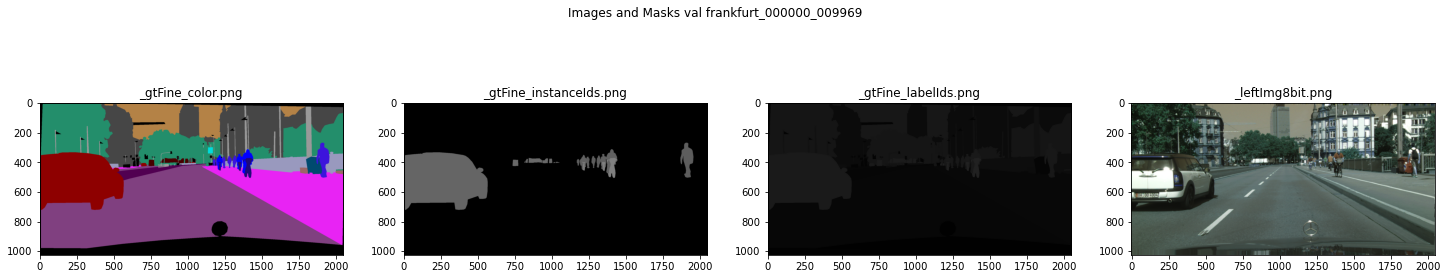

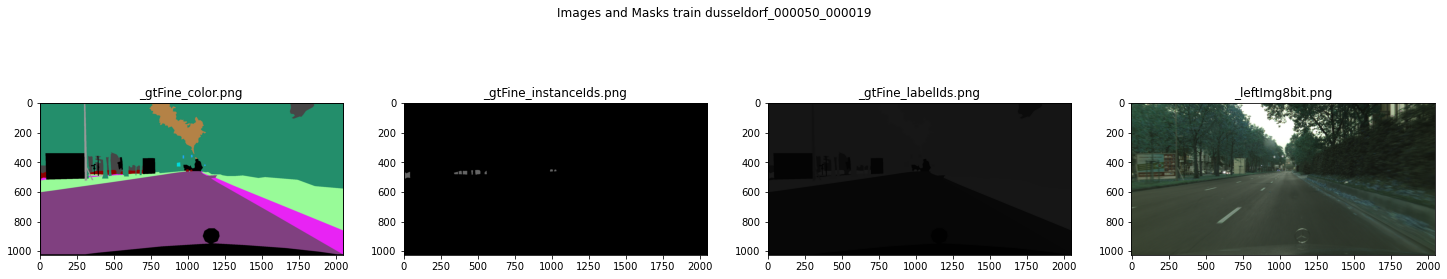

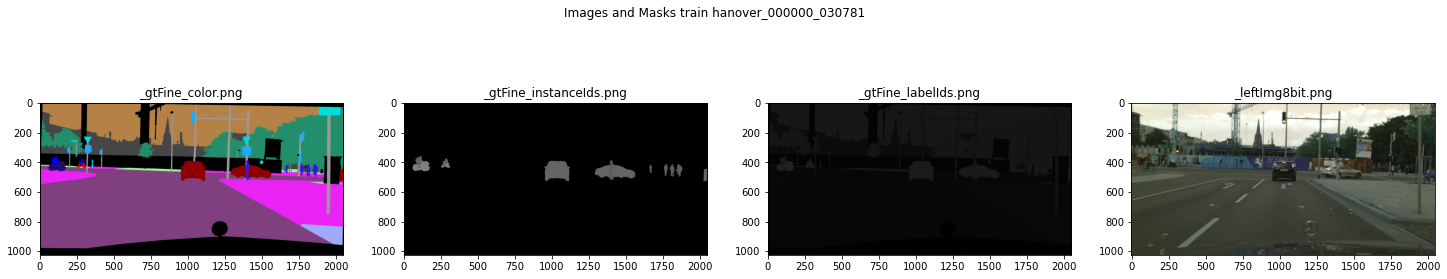

In [269]:
#Prendre un echantillon aléatoire, et afficher les photos appartenant à la même prise de vue, mais ayant subit différentes transformations
n_sample = 3
Files_ids_random = df.loc[df['File_type'] == 'gtFine',:].sample(n_sample)
Files_ids_random.drop_duplicates(keep='first', inplace=True)
title=['_gtFine_color.png', '_gtFine_instanceIds.png', '_gtFine_labelIds.png', '_leftImg8bit.png']
for i in Files_ids_random.values:
    sources_images = df.loc[((df['Phase'] == i[0]) & (df['City'] == i[1]) & (df['File_id1'] == i[4]) & (df['File_id2'] == i[5])),:].sort_values(by=['File_type'])
    path_gtfine_color = os.path.join(DATA_URL_GTFINE, i[0], i[1], i[1] + '_' + i[4] + '_' + i[5] + '_gtFine_color.png')
    path_gtfine_instanceIds = os.path.join(DATA_URL_GTFINE, i[0], i[1], i[1] + '_' + i[4] + '_' + i[5] + '_gtFine_instanceIds.png')
    path_gtfine_labelIds = os.path.join(DATA_URL_GTFINE, i[0], i[1], i[1] + '_' + i[4] + '_' + i[5] + '_gtFine_labelIds.png')
    path_leftlmg = os.path.join(DATA_URL_LEFTLMG, i[0], i[1], i[1] + '_' + i[4] + '_' + i[5] + '_leftImg8bit.png')
    filepaths = [path_gtfine_color, path_gtfine_instanceIds, path_gtfine_labelIds, path_leftlmg]
    plt.figure(figsize=(25, 5))
    plt.subplots_adjust(hspace=0.5)
    for j in range(4):
        #print(filepaths[j])
        plt.subplot(140 + 1 + j)
        plt.title(title[j])
        image = cv2.imread(filepaths[j])
        plt.imshow(image)
        plt.grid(False)
    plt.suptitle(f'Images and Masks {(i[0])} {(i[1])}_{(i[4])}_{(i[5])}')
    plt.show()

### Nettoyage des données



In [78]:
def get_info_from_filename(data: pd.DataFrame):
    data['File_id1'] = data['File'].str.split('_').str[1]
    data['File_id2'] = data['File'].str.split('_').str[2]
    data['File_type'] = data['File'].str.split('_').str[3]
    data['File_unique_index'] = data['City'] + '_' + data['File_id1'] + '_' + data['File_id2']
    return data
    
def link_images_masks(data_masks: pd.DataFrame, data_images: pd.DataFrame):
    """
    Permet de lier les images et les masques dans un seul dataframe
    :param data_images: DataFrame contenant les informations sur les images
    :param data_masks: DataFrame contenant les informations sur les masks
    :return: cleaned DataFrame
    """
    #Keep only lanelIDs from masks
    clean_data_masks = data_masks.loc[data_masks['File'].str.endswith('labelIds.png') == True, :]
    #clean_data_masks = data_masks.loc[(data_masks['File'].str.contains('labelIds') == True), :]

    #Get Info from filename
    clean_data_images = get_info_from_filename(data_images)
    clean_data_masks = get_info_from_filename(clean_data_masks)

    #Merge images and masks dataframes on File_id1 and File_id2
    #data = pd.merge(clean_data_images, clean_data_masks, how='inner', on=['File_id1', 'File_id2'])
    #data = pd.merge(clean_data_images, clean_data_masks, how='inner', on=['File_id1', 'File_id2', 'City', 'Phase'])
    data = pd.merge(clean_data_images, clean_data_masks, how='inner', on=['File_unique_index', 'Phase'])
    return data


In [79]:
clean_df = link_images_masks(df_gtfine, df_leftlmg)
clean_df

c:\Users\blanc\anaconda3\envs\IA_Poject8\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\blanc\anaconda3\envs\IA_Poject8\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\blanc\anaconda3\envs\IA_Poject8\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

Phase   City_x                                 File_x  \
0     test   berlin   berlin_000000_000019_leftImg8bit.png   
1     test   berlin   berlin_000001_000019_leftImg8bit.png   
2     test   berlin   berlin_000002_000019_leftImg8bit.png   
3     test   berlin   berlin_000003_000019_leftImg8bit.png   
4     test   berlin   berlin_000004_000019_leftImg8bit.png   
...    ...      ...                                    ...   
4995   val  munster  munster_000169_000019_leftImg8bit.png   
4996   val  munster  munster_000170_000019_leftImg8bit.png   
4997   val  munster  munster_000171_000019_leftImg8bit.png   
4998   val  munster  munster_000172_000019_leftImg8bit.png   
4999   val  munster  munster_000173_000019_leftImg8bit.png   

                                                 Path_x File_id1_x File_id2_x  \
0     c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000000     000019   
1     c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000001     000019   
2     c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000002     000019   
3     c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000003     000019   
4     c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000004     000019   
...                                                 ...        ...        ...   
4995  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000169     000019   
4996  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000170     000019   
4997  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000171     000019   
4998  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000172     000019   
4999  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000173     000019   

          File_type_x      File_unique_index   City_y  \
0     leftImg8bit.png   berlin_000000_000019   berlin   
1     leftImg8bit.png   berlin_000001_000019   berlin   
2     leftImg8bit.png   berlin_000002_000019   berlin   
3     leftImg8bit.png   berlin_000003_000019   berlin   
4     leftImg8bit.png   berlin_000004_000019   berlin   
...               ...                    ...      ...   
4995  leftImg8bit.png  munster_000169_000019  munster   
4996  leftImg8bit.png  munster_000170_000019  munster   
4997  leftImg8bit.png  munster_000171_000019  munster   
4998  leftImg8bit.png  munster_000172_000019  munster   
4999  leftImg8bit.png  munster_000173_000019  munster   

                                         File_y  \
0      berlin_000000_000019_gtFine_labelIds.png   
1      berlin_000001_000019_gtFine_labelIds.png   
2      berlin_000002_000019_gtFine_labelIds.png   
3      berlin_000003_000019_gtFine_labelIds.png   
4      berlin_000004_000019_gtFine_labelIds.png   
...                                         ...   
4995  munster_000169_000019_gtFine_labelIds.png   
4996  munster_000170_000019_gtFine_labelIds.png   
4997  munster_000171_000019_gtFine_labelIds.png   
4998  munster_000172_000019_gtFine_labelIds.png   
4999  munster_000173_000019_gtFine_labelIds.png   

                                                 Path_y File_id1_y File_id2_y  \
0     c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000000     000019   
1     c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000001     000019   
2     c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000002     000019   
3     c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000003     000019   
4     c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000004     000019   
...                                                 ...        ...        ...   
4995  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000169     000019   
4996  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000170     000019   
4997  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000171     000019   
4998  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000172     000019   
4999  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000173     000019   

     File_type_y

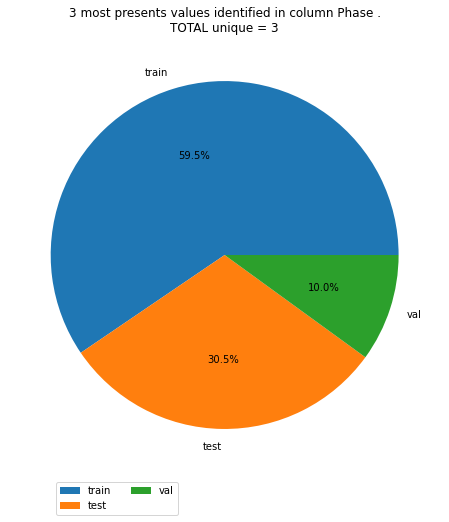

Phase
train   2975
test    1525
val      500

In [29]:
#Représenter le % des données, par train, val et test
plot_ntops_pie(clean_df, 'Phase', 3, False, False)

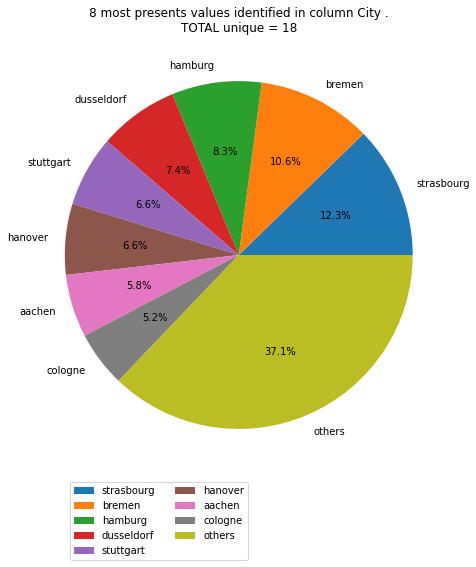

City
strasbourg   365
bremen       316
hamburg      248
dusseldorf   221
stuttgart    196
hanover      196
aachen       174
cologne      154
others      1105

In [30]:
#Représenter le % des données d'entrainement, pour les 8 villes les plus représentés
plot_ntops_pie(clean_df.loc[clean_df['Phase'] == 'train', :], 'City', 8, True, False)

In [357]:
#Représenter la proportion des données par ville
#plot_occurence_line(clean_df, 'City')

In [124]:
clean_df.head(2)

Phase  City_x                                File_x  \
0  test  berlin  berlin_000000_000019_leftImg8bit.png   
1  test  berlin  berlin_000001_000019_leftImg8bit.png   

                                              Path_x File_id1_x File_id2_x  \
0  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000000     000019   
1  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000001     000019   

       File_type_x     File_unique_index  City_y  \
0  leftImg8bit.png  berlin_000000_000019  berlin   
1  leftImg8bit.png  berlin_000001_000019  berlin   

                                     File_y  \
0  berlin_000000_000019_gtFine_labelIds.png   
1  berlin_000001_000019_gtFine_labelIds.png   

                                              Path_y File_id1_y File_id2_y  \
0  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000000     000019   
1  c:\Users\blanc\OpenClassrooms\IA_Project8_Open...     000001     000019   

  File_type_y  
0      gtFine  
1      gtFine

## Data_Generator from dataset

Afin d'entrainer notre futur réseau de neurones, il est essentiel de considérer le volume du jeu de données et les limitations mémoires.

Ainsi, nous devons utiliser un **data_generator** qui créé des donnée en batches et qui alimentera notre réseau lors de la phase d'entrainement.

Nous pouvons au choix utiliser tensorflow ou keras pour ce data_generator

Diffférentes documentation disponible:

    - [Step by Step Data Generator - Skeleton](https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly)
    - 



In [ ]:
def convert(list):
    return tuple(list)
def count_color_rgb(image):
    all_color = {}
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            color =  convert(image[x,y].tolist())
            if not color in all_color.keys():
                all_color[color] = 1
            else:
                all_color[color] += 1
    return all_color

def get_image_labelid(path:str):
    """Récupére le mask parfaitement formaté.
    argument:
    - path (type str): chemin d'accès complet ou partiel de l'image "_labelIds.png"
    """
    return convert_mask(cv2.imread(path,0))

cats = {
	'construction': [11, 12, 13, 14, 15, 16],
	'flat': [7, 8, 9, 10],
	'human': [24, 25],
	'nature': [21, 22],
	'object': [17, 18, 19, 20],
	'sky': [23],
	'vehicle': [26, 27, 28, 29, 30, 31, 32, 33, -1],
	'void': [0, 1, 2, 3, 4, 5, 6],
}


def convert_mask(img):
    """Cette méthode permet de convertir l'image '_labelids.png' du jeu de données de CityScapes.
    La méthode permet de récupérer l'image au format one_hot_encoder ou au format label_encoder.
    arguments:
    - img (type numpy.array): image du jeu de données CityScapes '...labelids.png' au format numpy  
    - one_hot_encoder (type bool optionnel)(default False) : Permet de choisir le mode de conversion (one_hot_encoder 8 channel ou label_encoder 1 channel)
    return:
    mask (type numpy.array) : mask pour la segmentation sémantique au format one hot encoder ou label encoder avec les 8 catégories principal (void, flat, construction, object, nature, sky, human, vehicle)
    """
    #print(len(img.shape))
    if len(img.shape) == 3:
        img = np.squeeze(img[:, :, 0])
    else:
        img = np.squeeze(img)
        #print(img.shape)
    mask = np.zeros((img.shape[0], img.shape[1], 8), dtype=np.uint16)
    print(mask.shape)
    for i in range(-1, 34):
        if i in cats['void']: 
            #Logical OR is applied to the elements of mask and labelIds_img. If mask.shape != labelIds_img.shape,.
            mask[:, :, 0] = np.logical_or(mask[:, :, 0], (img == i))
        elif i in cats['flat']:
            mask[:, :, 1] = np.logical_or(mask[:, :, 1], (img == i))
        elif i in cats['construction']:
            mask[:, :, 2] = np.logical_or(mask[:, :, 2], (img == i))
        elif i in cats['object']:
            mask[:, :, 3] = np.logical_or(mask[:, :, 3], (img == i))
        elif i in cats['nature']:
            mask[:, :, 4] = np.logical_or(mask[:, :, 4], (img == i))
        elif i in cats['sky']:
            mask[:, :, 5] = np.logical_or(mask[:, :, 5], (img == i))
        elif i in cats['human']:
            mask[:, :, 6] = np.logical_or(mask[:, :, 6], (img == i))
        elif i in cats['vehicle']:
            mask[:, :, 7] = np.logical_or(mask[:, :, 7], (img == i))
    return np.array(np.argmax(mask, axis=2), dtype='uint8')

In [425]:
# Notre classe hérite de la classe Keras.utils.Sequence
# Elle permet de créer un générateur de données
# Cette classe parente vous assure dans le cas ou vous souhaitez utiliser du calcul parallèle avec vos threads, de garantir de parcourir une seule et unique fois vos données au cours d’une époch
class Dataloader(keras.utils.Sequence):
    """Load data from dataset to build bacthes
    Args:
        dataset : dataframe listing data and paths
        n_sample : to work with a reduced dataset
        batch_size: Integet number of images in batch.
        shuffle: Boolean, if `True` shuffle dataset each epoch.
        resize: Boolean,  if `True` resize images and mask to same dimensions
        resize_width & resize_height: New dimensions after resizing
        display: display images when calling dataloader
        phase: allow to set if dataloader shall filter on train, val or test images/masks
        augmentation: Variable defining augmentation of image and mask
        normalization: Boolean,  if `True` normalizes images and masks RGB values ; The range for each individual colour is 0-255
    """
    # We provide one dataset, containing labelIds and 
    def __init__(self, dataset, n_sample, batch_size=1, shuffle=False, resize=None, resize_width=256, resize_height=128, display=None, phase='train', augmentation=None, normalization=None):
        self.n_sample = n_sample
        self.phase = phase
        self.dataset = dataset.loc[dataset['Phase'] == self.phase, :].sample(self.n_sample) #ou dataset si on veut prendre tour le jeu de donnée
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.resize = resize
        self.resize_width = resize_width
        self.resize_height = resize_height
        self.augmentation = augmentation
        self.normalization = normalization
        self.display = display
        self.on_epoch_end()

    def __getitem__(self, i):
        # collect batch images and masks
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        #print('start barch is ', start)
        #print('stop barch is ', stop)
        images = []
        masks = []
        for j in range(start, stop):
            # Store entire paths to image_file and mask_file variable
            image_file = list(self.dataset['Path_x'])[j]
            print(image_file)
            mask_file = list(self.dataset['Path_y'])[j]
            unique_index_file = list(self.dataset['File_unique_index'])[j]

            # OpenImages and masks using OpenCV ibrary, and convert in np array
            image = cv2.imread(image_file)
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            mask = cv2.imread(mask_file)
            #mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
            
            # apply resize
            if self.resize:
                dim = (self.resize_width, self.resize_height)
                original_height = image.shape[0]
                original_width = image.shape[1]
                original_channels = image.shape[2]
                image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA) # resize image
                mask = cv2.resize(mask, dim, interpolation = cv2.INTER_AREA)
                new_height = image.shape[0]
                new_width = image.shape[1]
                new_channels = image.shape[2]
                print('original height was ', original_height, ' and new height is ', new_height)
                print('original width was ', original_width, ' and new width is ', new_width)
                print('original channels was ', original_channels, ' and new channels is ', new_channels)
            
            # apply display
            if self.display:
                #Display Image and Mask
                plt.figure(figsize=(25, 5))
                plt.subplots_adjust(hspace=0.5)
                plt.subplot(120 + 1 + 0)
                plt.imshow(image)
                plt.subplot(120 + 1 + 1)
                plt.imshow(mask)
                plt.grid(False)
                plt.suptitle(f'Images and Masks {unique_index_file}')
                plt.show()

            # apply normalization : Normalizing RGB values ; The range for each individual colour is 0-255 (as 2^8 = 256 possibilities).
            if self.normalization:
                normalizedImg = np.zeros((800, 800))
                image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX) #image/255 ou normalizedImg
                mask = cv2.normalize(mask, None, 0, 255, cv2.NORM_MINMAX) #mask/255
                # apply display
                if self.display:
                    print(f'----------------Normalized Image and Mask {j} from batch collected-----------------')
                    #Display Image and Mask
                    plt.figure(figsize=(25, 5))
                    plt.subplots_adjust(hspace=0.5)
                    plt.subplot(120 + 1 + 0)
                    plt.imshow(image)
                    plt.subplot(120 + 1 + 1)
                    plt.imshow(mask)
                    plt.grid(False)
                    plt.suptitle(f'Normalized Images and Masks {unique_index_file}')
                    plt.show()
            
            # apply augmentations
            if ((self.augmentation is not None) & (self.phase == 'train')):
                # Augment an image
                sample = self.augmentation(image=image, mask=mask)
                augmented_image, augmented_mask = sample['image'], sample['mask']
                # apply display
                if self.display:
                    print(f'----------------Augmented Image and Mask {j} from batch collected-----------------')
                    #Display Image and Mask
                    plt.figure(figsize=(25, 5))
                    plt.subplots_adjust(hspace=0.5)
                    plt.subplot(120 + 1 + 0)
                    plt.imshow(augmented_image)
                    plt.subplot(120 + 1 + 1)
                    plt.imshow(augmented_mask)
                    plt.grid(False)
                    plt.suptitle(f'Augmented Images and Masks {unique_index_file}')
                    plt.show()
                    images.append(augmented_image)
                    masks.append(augmented_mask)
                    
            # append image and mask to batch
            images.append(image)
            #print('images len is ', len(images))
            masks.append(mask)   
            #print('masks len is ', len(masks))
            print(f'----------------Image and Mask {j} from batch collected-----------------')

        # transpose list of lists
        image_batch = np.stack(images, axis=0) #A confirmer si images ou image
        #print('image_batch shape is ', image_batch.shape)
        mask_batch = np.stack(masks, axis=0) #A confirmer si masks ou mask
        #print('mask_batch shape is ', mask_batch.shape)
        return image_batch, mask_batch
    
    def __len__(self):
        """Denotes the number of batches per epoch"""
        return len(self.dataset) // self.batch_size
    
    def on_epoch_end(self):
        """Callback function to shuffle dataset each epoch"""
        if self.shuffle:
            np.random.shuffle(self.dataset.values)

In [358]:
# Divide the number of images in directory by batch_size 
n_sample = 20
Batch_size = 2
Shuffle = True
Resize = True
Resize_width = 512
Resize_height = 256
Display_Image_Mask = True
Phase = 'train'

# Declare an augmentation pipeline
# Augmentation = None 
Augmentation = A.Compose(
                    [#A.RandomCrop(width=512, height=256), 
                    A.Rotate(25),
                    A.OneOf([A.RGBShift(), A.HueSaturationValue()]),
                    #A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0), 
                    #A.IAAPerspective(p=0.5), 
                    #A.HorizontalFlip(p=0.5),
                    A.OneOf([A.CLAHE(), A.RandomBrightnessContrast(), A.RandomGamma()]), 
                    ])

Normalization = True
dataloader = Dataloader(clean_df, n_sample, Batch_size, Shuffle, Resize, Resize_width, Resize_height, Display_Image_Mask, Phase, Augmentation, Normalization)
# Denotes the number of batches per epoch = Number of picture / batch_size
len(dataloader)


10

c:\Users\blanc\OpenClassrooms\IA_Project8_Openclassrooms_VoitureAutonome\Dataset\P8_Cityscapes_leftImg8bit_trainvaltest\leftImg8bit\train\zurich\zurich_000004_000019_leftImg8bit.png
original height was  1024  and new height is  256
original width was  2048  and new width is  512
original channels was  3  and new channels is  3


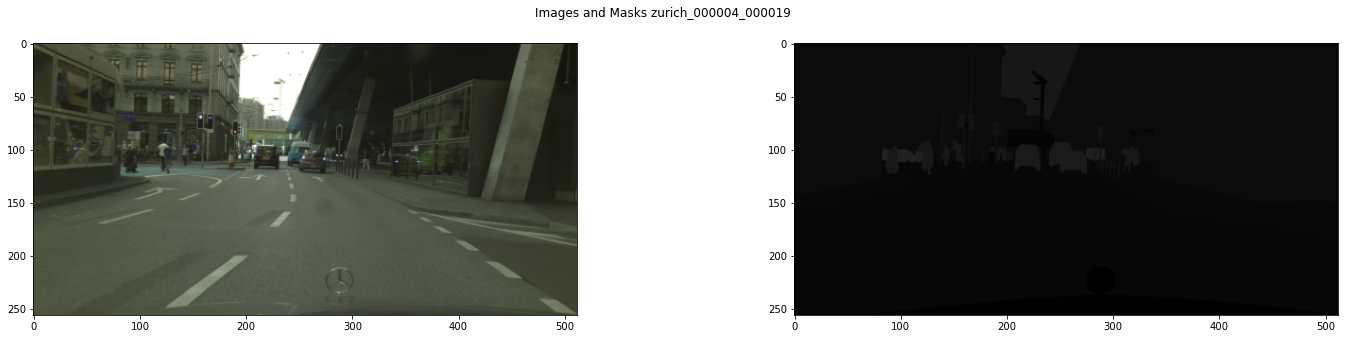

----------------Normalized Image and Mask 0 from batch collected-----------------


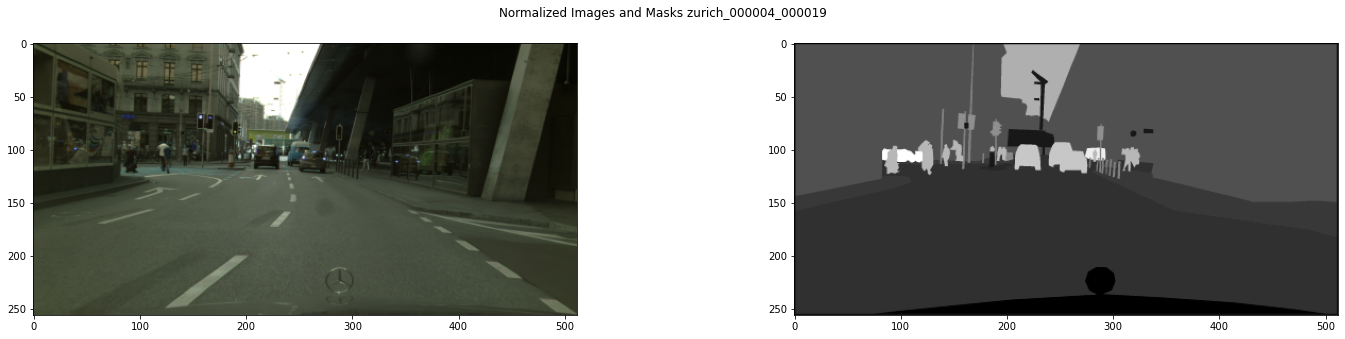

----------------Augmented Image and Mask 0 from batch collected-----------------


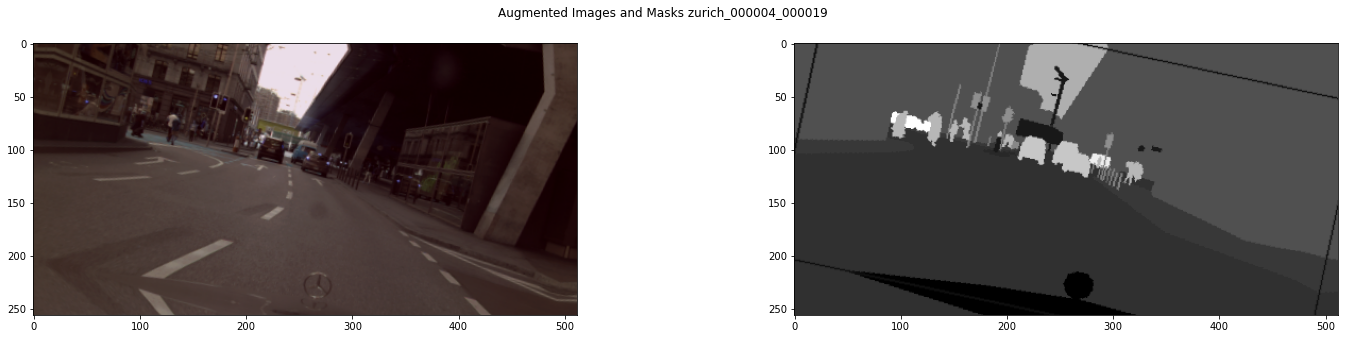

----------------Image and Mask 0 from batch collected-----------------
c:\Users\blanc\OpenClassrooms\IA_Project8_Openclassrooms_VoitureAutonome\Dataset\P8_Cityscapes_leftImg8bit_trainvaltest\leftImg8bit\train\weimar\weimar_000071_000019_leftImg8bit.png
original height was  1024  and new height is  256
original width was  2048  and new width is  512
original channels was  3  and new channels is  3


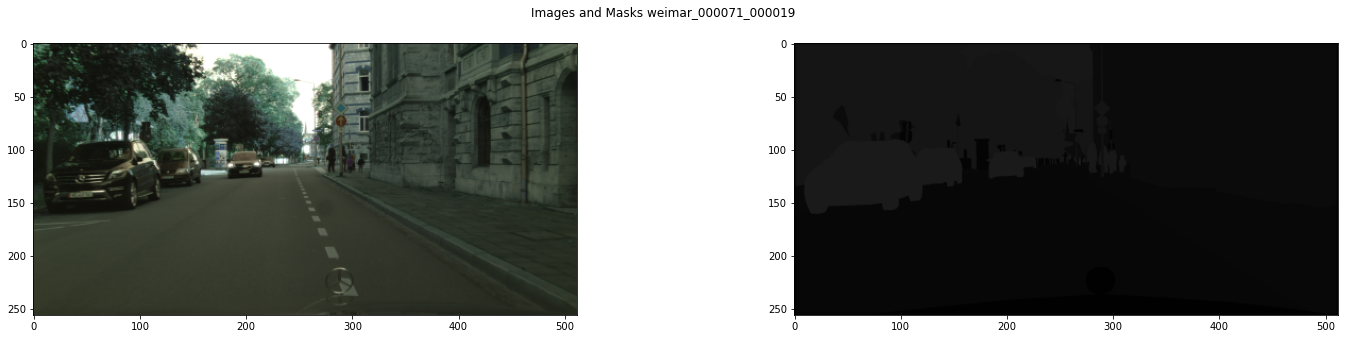

----------------Normalized Image and Mask 1 from batch collected-----------------


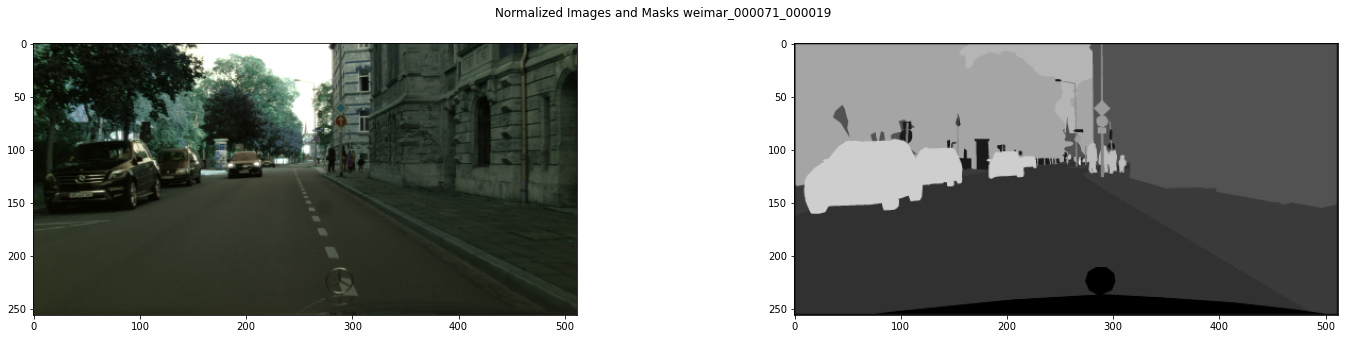

----------------Augmented Image and Mask 1 from batch collected-----------------


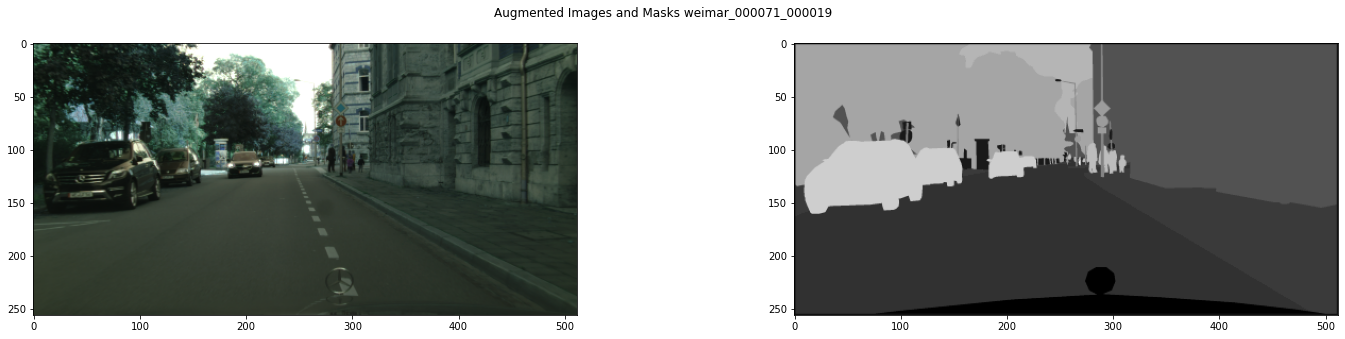

----------------Image and Mask 1 from batch collected-----------------


(4, 256, 512, 3)

In [359]:
# This returns the images and mask for batch 0 numpy array
#image_batch, mask_batch = dataloader[0]

#This returns image_batch and mask_batch shapes
dataloader[0][0].shape

# Conversion des categories / classes

A partir de la source [GitHub](https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py)

Tout d'abord, nous cherchons à comprendre la structure des couleurs des fichiers labelIds.

Nous notons par cet exercice, que **34 classes distinctes sont représentées**.
Notre objectifs est de **travailler un segmentation à 8** , nous devons donc renommer/convertirs des 34classes en 8classes.

Voici les 8 classes attendues: "void", "flat", "construction", "object", "nature", "sky", "human" and "vehicle".

In [260]:
#Import functions created
from labels import *
 

In [395]:
i = 2500
image_test = cv2.imread(list(clean_df['Path_y'])[i])
#image_test = cv2.imread("c:/Users/blanc/OpenClassrooms/IA_Project8_Openclassrooms_VoitureAutonome/Dataset/P8_Cityscapes_gtFine_trainvaltest/gtFine/train/" + "strasbourg/" + "strasbourg_000000_029051_gtFine_labelIds.png")
print(list(clean_df['Path_y'])[i])
count_color_rgb(image_test)

c:\Users\blanc\OpenClassrooms\IA_Project8_Openclassrooms_VoitureAutonome\Dataset\P8_Cityscapes_gtFine_trainvaltest\gtFine\train\dusseldorf\dusseldorf_000150_000019_gtFine_labelIds.png


{(3, 3, 3): 31634,
 (11, 11, 11): 700926,
 (23, 23, 23): 89686,
 (4, 4, 4): 64965,
 (21, 21, 21): 47136,
 (17, 17, 17): 6936,
 (20, 20, 20): 11847,
 (19, 19, 19): 3228,
 (24, 24, 24): 1997,
 (26, 26, 26): 122288,
 (7, 7, 7): 849983,
 (5, 5, 5): 5697,
 (33, 33, 33): 5290,
 (8, 8, 8): 19154,
 (9, 9, 9): 54851,
 (1, 1, 1): 81534}

In [400]:
    from labels import labels, name2label, id2label, trainId2label
    # Example usages:

    # Map from name to label
    name = 'ego vehicle'
    print(labels[id])
    id   = name2label[name].id
    print("ID of label '{name}': {id}".format( name=name, id=id ))

    # Map from ID to label
    category = id2label[id].category
    print("Category of label with ID '{id}': {category}".format( id=id, category=category ))

    # Map from trainID to label
    trainId = 0
    name = trainId2label[trainId].name
    print("Name of label with trainID '{id}': {name}".format( id=trainId, name=name ))


Label(name='tunnel', id=16, trainId=255, category='construction', categoryId=2, hasInstances=False, ignoreInEval=True, color=(150, 120, 90))
ID of label 'ego vehicle': 1
Category of label with ID '1': void
Name of label with trainID '0': road


(1024, 2048, 8)


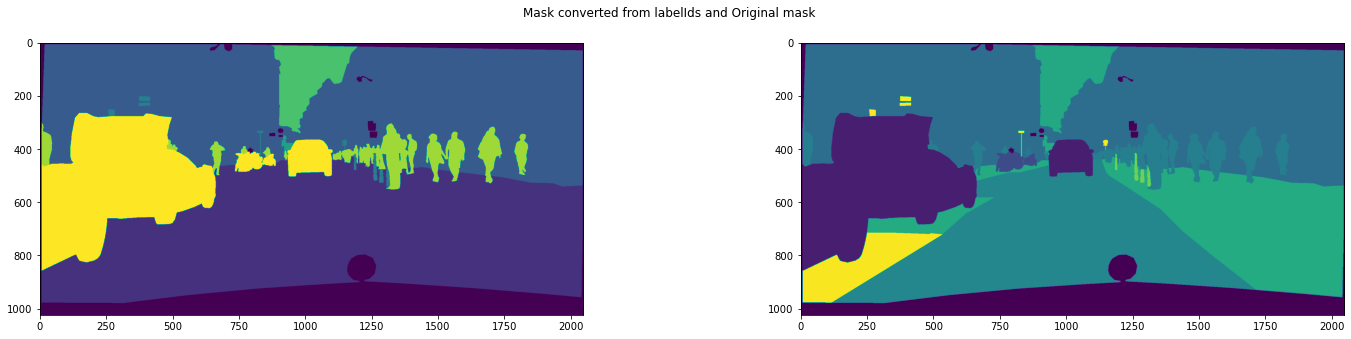

In [424]:
i = 2600
j = 120
image_test = cv2.imread(list(clean_df['Path_y'])[i])
#image_test = cv2.imread("c:/Users/blanc/OpenClassrooms/IA_Project8_Openclassrooms_VoitureAutonome/Dataset/P8_Cityscapes_gtFine_trainvaltest/gtFine/train/" + "strasbourg/" + "strasbourg_000000_029051_gtFine_labelIds.png")

#mask_id = get_image_labelid((list(clean_df['Path_y'])[i]))
mask_idbis = convert_mask(cv2.imread("c:/Users/blanc/OpenClassrooms/IA_Project8_Openclassrooms_VoitureAutonome/Dataset/P8_Cityscapes_gtFine_trainvaltest/gtFine/train/" + "strasbourg/" + "strasbourg_000000_029051_gtFine_labelIds.png",0))
mask_origin = cv2.imread("c:/Users/blanc/OpenClassrooms/IA_Project8_Openclassrooms_VoitureAutonome/Dataset/P8_Cityscapes_gtFine_trainvaltest/gtFine/train/" + "strasbourg/" + "strasbourg_000000_029051_gtFine_color.png",0)

plt.figure(figsize=(25, 5))
plt.subplots_adjust(hspace=0.5)
plt.subplot(120 + 1 + 0)
plt.imshow(mask_idbis)
plt.subplot(120 + 1 + 1)
plt.imshow(mask_origin)
plt.grid(False)
plt.suptitle(f'Mask converted from labelIds and Original mask')
plt.show()

In [ ]:
width = 256
height = 128
dim = (width, height)
# Notre classe hérite de la classe Keras.utils.Sequence
# Elle permet de créer un générateur de données
# Cette classe parente vous assure dans le cas ou vous souhaitez utiliser du calcul parallèle avec vos threads, de garantir de parcourir une seule et unique fois vos données au cours d’une époch
class Dataloader(keras.utils.Sequence):
    """Load data from data_folder to build bacthes
    
    Args:
        data_folder : folder directory string
        batch_size: Integet number of images in batch.
        shuffle: Boolean, if `True` shuffle image indexes each epoch.
        augmentation: Variable defining augmentation of image and mask
    """
    # We provide one address where all folders are stored
    def __init__(self, data_folder, batch_size=1, shuffle=False, resize=None, display=None, augmentation=None, normalization=None):
        self.data_folder = data_folder
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.resize = resize
        self.augmentation = augmentation
        self.normalization = normalization
        self.display = display
        # Extract Images ID strings from filenames
        self.indexes = list(set(["_".join(path.split('_')[:3]) for path in os.listdir(data_folder)]))
        self.indexes = [os.path.join(self.data_folder, path) for path in self.indexes]    
        #print(self.indexes[0])    
        self.on_epoch_end()

    def __getitem__(self, i):
        # collect batch images and masks
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        #print('start barch is ', start)
        #print('stop barch is ', stop)
        images = []
        masks = []
        for j in range(start, stop):
            root_file = self.indexes[j]
            # Build exact fienames from extract ID strings
            image_file = (root_file + '_leftImg8bit.png')
            mask_file = (root_file + '_gtFine_labelIds.png')
            #print(image_file, mask_file)
            # OpenImages and masks using OpenCV ibrary, and convert in np array
            scale_percent = 50 # percent of original size
            image = cv2.imread(image_file)
            mask = cv2.imread(mask_file)
            
            # apply resize
            if self.resize:
                original_height = image.shape[0]
                original_width = image.shape[1]
                original_channels = image.shape[2]
                image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA) # resize image
                mask = cv2.resize(mask, dim, interpolation = cv2.INTER_AREA)
                new_height = image.shape[0]
                new_width = image.shape[1]
                new_channels = image.shape[2]
                print('original height was ', original_height, ' and new height is ', new_height)
                print('original width was ', original_width, ' and new width is ', new_width)
                print('original channels was ', original_channels, ' and new channels is ', new_channels)
            
            # apply display
            if self.display:
                #Display Image and Mask
                plt.figure(figsize=(25, 5))
                plt.subplots_adjust(hspace=0.5)
                plt.subplot(120 + 1 + 0)
                plt.imshow(image)
                plt.subplot(120 + 1 + 1)
                plt.imshow(mask)
                plt.grid(False)
                plt.suptitle(f'Images and Masks {self.indexes[j]}')
                plt.show()

            # apply normalization : Normalizing RGB values ; The range for each individual colour is 0-255 (as 2^8 = 256 possibilities).
            if self.normalization:
                normalizedImg = np.zeros((800, 800))
                image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX) #image/255 ou normalizedImg
                mask = cv2.normalize(mask, None, 0, 255, cv2.NORM_MINMAX) #mask/255
                # apply display
                if self.display:
                    print(f'----------------Normalized Image and Mask {j} from batch collected-----------------')
                    #Display Image and Mask
                    plt.figure(figsize=(25, 5))
                    plt.subplots_adjust(hspace=0.5)
                    plt.subplot(120 + 1 + 0)
                    plt.imshow(image)
                    plt.subplot(120 + 1 + 1)
                    plt.imshow(mask)
                    plt.grid(False)
                    plt.suptitle(f'Normalized Images and Masks {self.indexes[j]}')
                    plt.show()
            
            # apply augmentations
            if self.augmentation:
                sample = self.augmentation(image=image, mask=mask)
                image, mask = sample['image'], sample['mask']
            
            # append image and mask to batch
            images.append(image)
            #print('images len is ', len(images))
            masks.append(mask)   
            #print('masks len is ', len(masks))
            print(f'----------------Image and Mask {j} from batch collected-----------------')

        # transpose list of lists
        image_batch = np.stack(images, axis=0) #A confirmer si images ou image
        print('image_batch shape is ', image_batch.shape)
        
        mask_batch = np.stack(masks, axis=0) #A confirmer si masks ou mask
        print('mask_batch shape is ', mask_batch.shape)
        #print(np.stack(mask, axis=0).shape)
        
        return image_batch, mask_batch
    
    def __len__(self):
        """Denotes the number of batches per epoch"""
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        """Callback function to shuffle indexes each epoch"""
        if self.shuffle:
            np.random.shuffle(self.indexes)  

# Data Generator from folder

NameError: name 'self' is not defined

In [70]:
width = 256
height = 128
dim = (width, height)
# Notre classe hérite de la classe Keras.utils.Sequence
# Elle permet de créer un générateur de données
# Cette classe parente vous assure dans le cas ou vous souhaitez utiliser du calcul parallèle avec vos threads, de garantir de parcourir une seule et unique fois vos données au cours d’une époch
class Dataloader(keras.utils.Sequence):
    """Load data from data_folder to build bacthes
    
    Args:
        data_folder : folder directory string
        batch_size: Integet number of images in batch.
        shuffle: Boolean, if `True` shuffle image indexes each epoch.
        augmentation: Variable defining augmentation of image and mask
    """
    # We provide one address where all folders are stored
    def __init__(self, data_folder, batch_size=1, shuffle=False, resize=None, display=None, augmentation=None, normalization=None):
        self.data_folder = data_folder
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.resize = resize
        self.augmentation = augmentation
        self.normalization = normalization
        self.display = display
        # Extract Images ID strings from filenames
        self.indexes = list(set(["_".join(path.split('_')[:3]) for path in os.listdir(data_folder)]))
        #print(self.indexes[0])    
        self.indexes = [os.path.join(self.data_folder, path) for path in self.indexes]    
        #print(self.indexes[0])    
        self.on_epoch_end()

    def __getitem__(self, i):
        # collect batch images and masks
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        #print('start barch is ', start)
        #print('stop barch is ', stop)
        images = []
        masks = []
        for j in range(start, stop):
            root_file = self.indexes[j]
            # Build exact fienames from extract ID strings
            image_file = (root_file + '_leftImg8bit.png')
            mask_file = (root_file + '_gtFine_labelIds.png')
            #print(image_file, mask_file)
            # OpenImages and masks using OpenCV ibrary, and convert in np array
            scale_percent = 50 # percent of original size
            image = cv2.imread(image_file)
            mask = cv2.imread(mask_file)
            
            # apply resize
            if self.resize:
                original_height = image.shape[0]
                original_width = image.shape[1]
                original_channels = image.shape[2]
                image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA) # resize image
                mask = cv2.resize(mask, dim, interpolation = cv2.INTER_AREA)
                new_height = image.shape[0]
                new_width = image.shape[1]
                new_channels = image.shape[2]
                print('original height was ', original_height, ' and new height is ', new_height)
                print('original width was ', original_width, ' and new width is ', new_width)
                print('original channels was ', original_channels, ' and new channels is ', new_channels)
            
            # apply display
            if self.display:
                #Display Image and Mask
                plt.figure(figsize=(25, 5))
                plt.subplots_adjust(hspace=0.5)
                plt.subplot(120 + 1 + 0)
                plt.imshow(image)
                plt.subplot(120 + 1 + 1)
                plt.imshow(mask)
                plt.grid(False)
                plt.suptitle(f'Images and Masks {self.indexes[j]}')
                plt.show()

            # apply normalization : Normalizing RGB values ; The range for each individual colour is 0-255 (as 2^8 = 256 possibilities).
            if self.normalization:
                normalizedImg = np.zeros((800, 800))
                image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX) #image/255 ou normalizedImg
                mask = cv2.normalize(mask, None, 0, 255, cv2.NORM_MINMAX) #mask/255
                # apply display
                if self.display:
                    print(f'----------------Normalized Image and Mask {j} from batch collected-----------------')
                    #Display Image and Mask
                    plt.figure(figsize=(25, 5))
                    plt.subplots_adjust(hspace=0.5)
                    plt.subplot(120 + 1 + 0)
                    plt.imshow(image)
                    plt.subplot(120 + 1 + 1)
                    plt.imshow(mask)
                    plt.grid(False)
                    plt.suptitle(f'Normalized Images and Masks {self.indexes[j]}')
                    plt.show()
            
            # apply augmentations
            if self.augmentation:
                sample = self.augmentation(image=image, mask=mask)
                image, mask = sample['image'], sample['mask']
            
            # append image and mask to batch
            images.append(image)
            #print('images len is ', len(images))
            masks.append(mask)   
            #print('masks len is ', len(masks))
            print(f'----------------Image and Mask {j} from batch collected-----------------')

        # transpose list of lists
        image_batch = np.stack(images, axis=0) #A confirmer si images ou image
        print('image_batch shape is ', image_batch.shape)
        
        mask_batch = np.stack(masks, axis=0) #A confirmer si masks ou mask
        print('mask_batch shape is ', mask_batch.shape)
        #print(np.stack(mask, axis=0).shape)
        
        return image_batch, mask_batch
    
    def __len__(self):
        """Denotes the number of batches per epoch"""
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        """Callback function to shuffle indexes each epoch"""
        if self.shuffle:
            np.random.shuffle(self.indexes)  

In [71]:
#Build Data path
DATA_REDUCED_GTFINE = os.path.join(src_path, "Dataset", "gtFine_reduced", "gtFine") #os.path.join(src_path, "Dataset", "P8_Cityscapes_gtFine_trainvaltest", "gtFine")
print(DATA_REDUCED_GTFINE)
DATA_REDUCED_LEFTLMG = os.path.join(src_path, "Dataset", "leftImg_reduced", "leftImg8bit") #os.path.join(src_path, "Dataset", "P8_Cityscapes_leftImg8bit_trainvaltest", "leftImg8bit")
print(DATA_REDUCED_LEFTLMG)
DATA_MERGED_REDUCED = os.path.join(src_path, "Dataset", "merged_reduced") #os.path.join(src_path, "Dataset", "P8_Cityscapes_leftImg8bit_trainvaltest", "leftImg8bit")
print(DATA_MERGED_REDUCED)

c:\Users\blanc\OpenClassrooms\IA_Project8_Openclassrooms_VoitureAutonome\Dataset\gtFine_reduced\gtFine
c:\Users\blanc\OpenClassrooms\IA_Project8_Openclassrooms_VoitureAutonome\Dataset\leftImg_reduced\leftImg8bit
c:\Users\blanc\OpenClassrooms\IA_Project8_Openclassrooms_VoitureAutonome\Dataset\merged_reduced


strasbourg_000000_001278
c:\Users\blanc\OpenClassrooms\IA_Project8_Openclassrooms_VoitureAutonome\Dataset\merged_reduced\strasbourg_000000_001278
original height was  1024  and new height is  128
original width was  2048  and new width is  256
original channels was  3  and new channels is  3


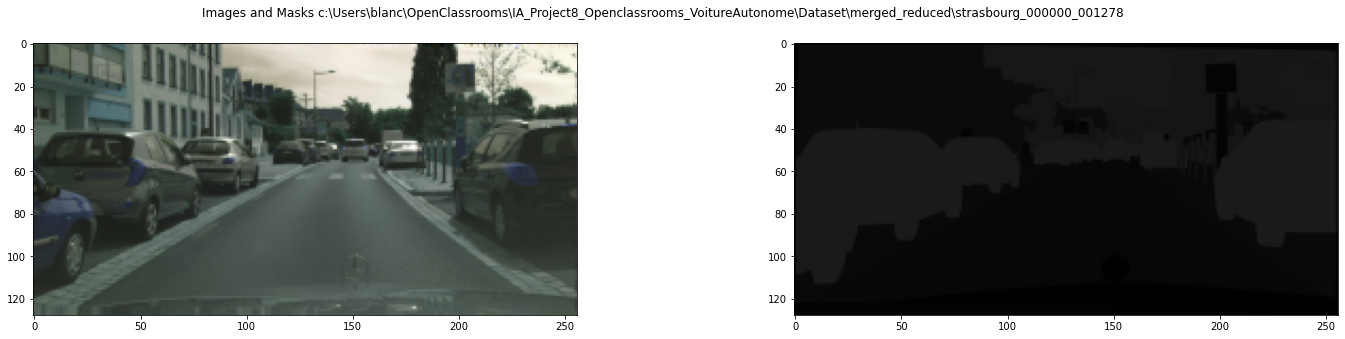

----------------Normalized Image and Mask 0 from batch collected-----------------


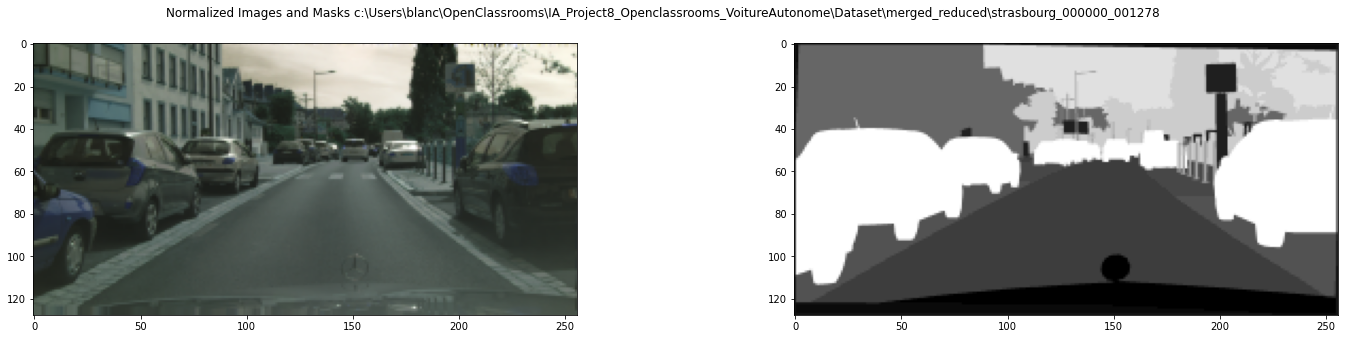

----------------Image and Mask 0 from batch collected-----------------
original height was  1024  and new height is  128
original width was  2048  and new width is  256
original channels was  3  and new channels is  3


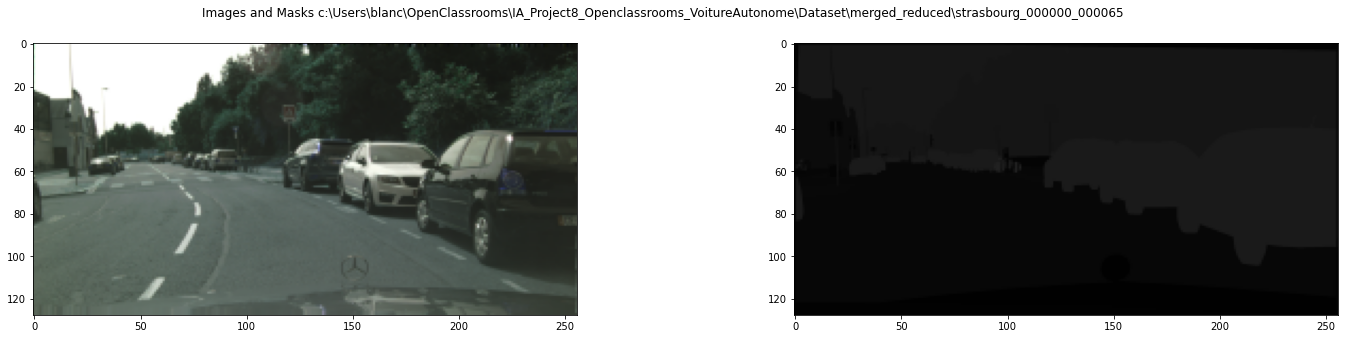

----------------Normalized Image and Mask 1 from batch collected-----------------


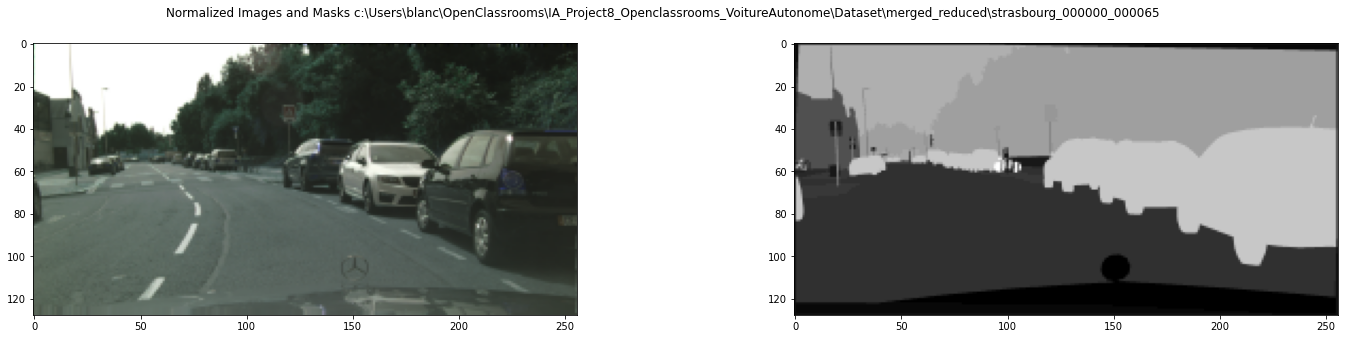

----------------Image and Mask 1 from batch collected-----------------
image_batch shape is  (2, 128, 256, 3)
mask_batch shape is  (2, 128, 256, 3)


In [72]:
# Divide the number of images in directory by batch_size 
Batch_size = 2
Shuffle = False
Resize = True
Display_Image_Mask = True
Augmentation = False
Normalization = True
dataloader = Dataloader(DATA_MERGED_REDUCED, Batch_size, Shuffle, Resize, Display_Image_Mask, Augmentation, Normalization)
# Denotes the number of batches per epoch = Number of picture / batch_size
len(dataloader)
# This returns the images and mask for batch 0 numpy array
image_batch, mask_batch = dataloader[0]

original height was  1024  and new height is  128
original width was  2048  and new width is  256
original channels was  3  and new channels is  3


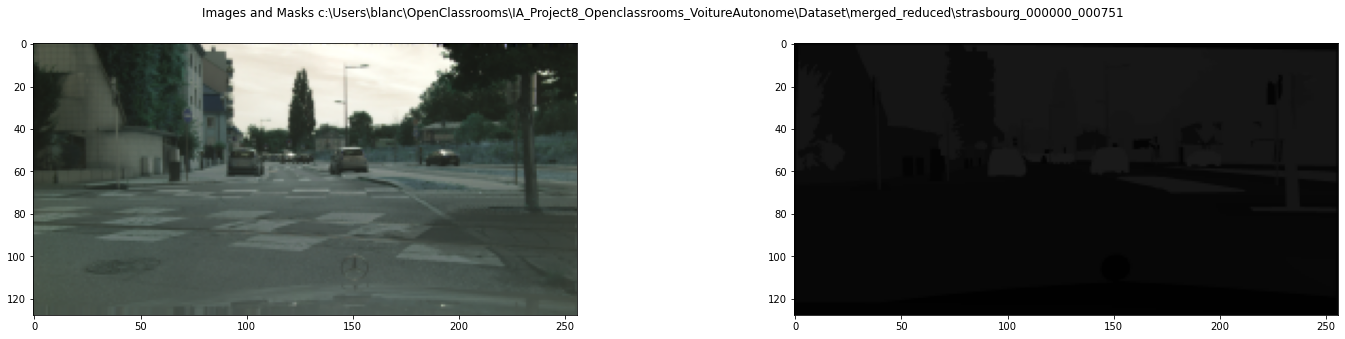

----------------Normalized Image and Mask 0 from batch collected-----------------


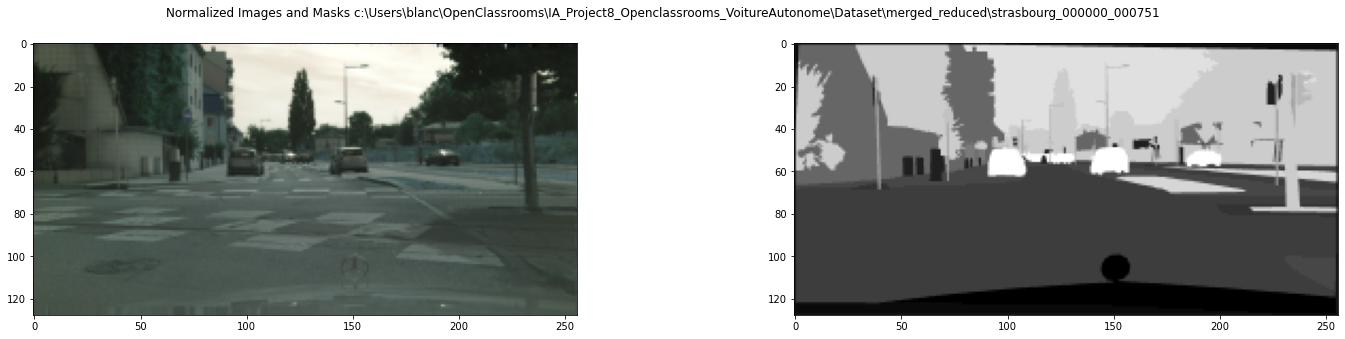

----------------Image and Mask 0 from batch collected-----------------
original height was  1024  and new height is  128
original width was  2048  and new width is  256
original channels was  3  and new channels is  3


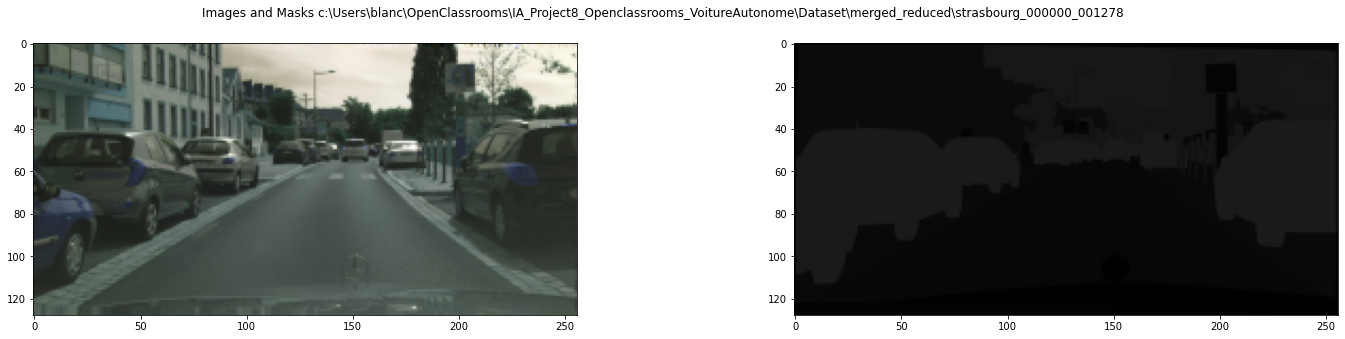

----------------Normalized Image and Mask 1 from batch collected-----------------


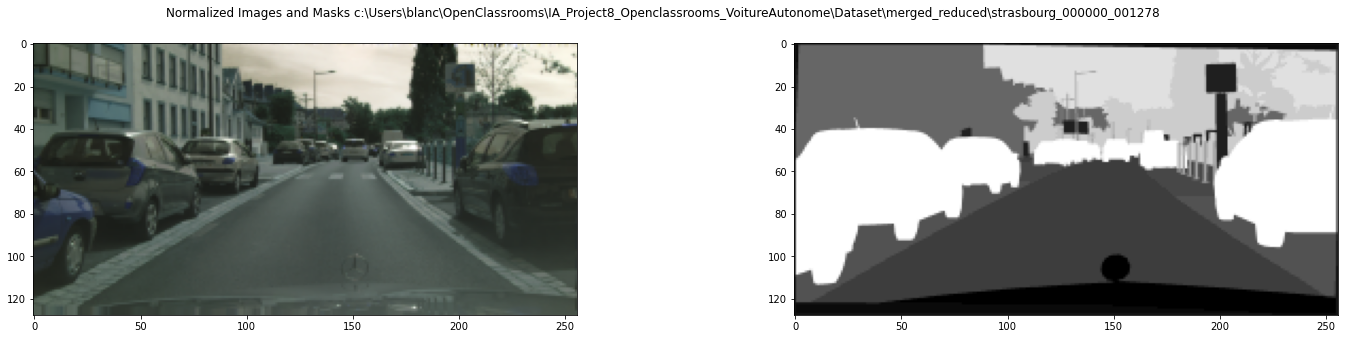

----------------Image and Mask 1 from batch collected-----------------
image_batch shape is  (2, 128, 256, 3)
mask_batch shape is  (2, 128, 256, 3)


In [160]:
# This returns the images and mask for batch 0 numpy array
image_batch, mask_batch = dataloader[0]
# This returns the mask batch numpy array
#dataloader[0][1]
# Denotes the number of batches per epoch = Number of picture / batch_size
#len(dataloader[0])


In [248]:
image_batch.shape

(2, 128, 256, 3)

In [249]:
mask_batch.shape

(2, 256, 512, 3)

original height was  1024  and new height is  128
original width was  2048  and new width is  256
original channels was  3  and new channels is  3


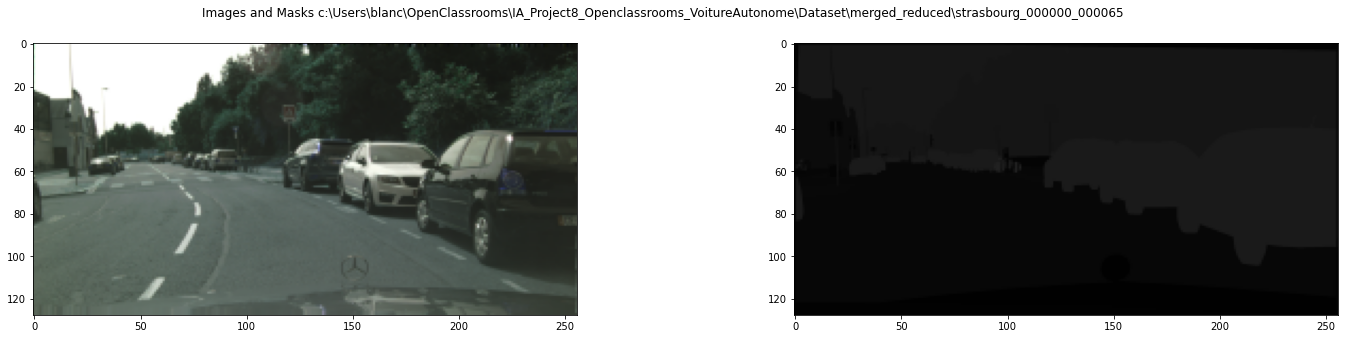

----------------Image and Mask 0 from batch collected-----------------
original height was  1024  and new height is  128
original width was  2048  and new width is  256
original channels was  3  and new channels is  3


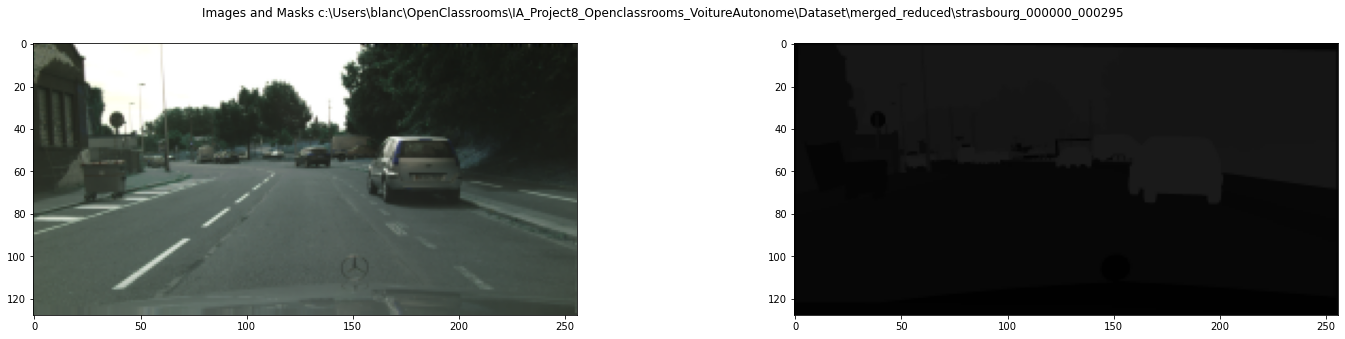

----------------Image and Mask 1 from batch collected-----------------
image_batch shape is  (2, 128, 256, 3)
mask_batch shape is  (2, 128, 256, 3)


In [228]:
# This returns the image and mask for batch 0
image_0, mask_0 = dataloader[0][0]
image_0 = Image.fromarray(image_0, 'RGB')
image_0.show()